# <center>Analyse de données - Variance - iris<center>

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Chargement du fichier

In [2]:
iris = pd.read_csv("data/iris.csv")

## Analyse du fichier

In [3]:
iris.info()
iris

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   longueur_sepal  150 non-null    float64
 1   largeur_sepal   150 non-null    float64
 2   longueur_petal  150 non-null    float64
 3   largeur_petal   150 non-null    float64
 4   espece          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espece
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Analyse de corrélation

In [4]:
irisCorr = iris.corr()
print(irisCorr)

                longueur_sepal  largeur_sepal  longueur_petal  largeur_petal
longueur_sepal        1.000000      -0.117570        0.871754       0.817941
largeur_sepal        -0.117570       1.000000       -0.428440      -0.366126
longueur_petal        0.871754      -0.428440        1.000000       0.962865
largeur_petal         0.817941      -0.366126        0.962865       1.000000


### Analyse graphique

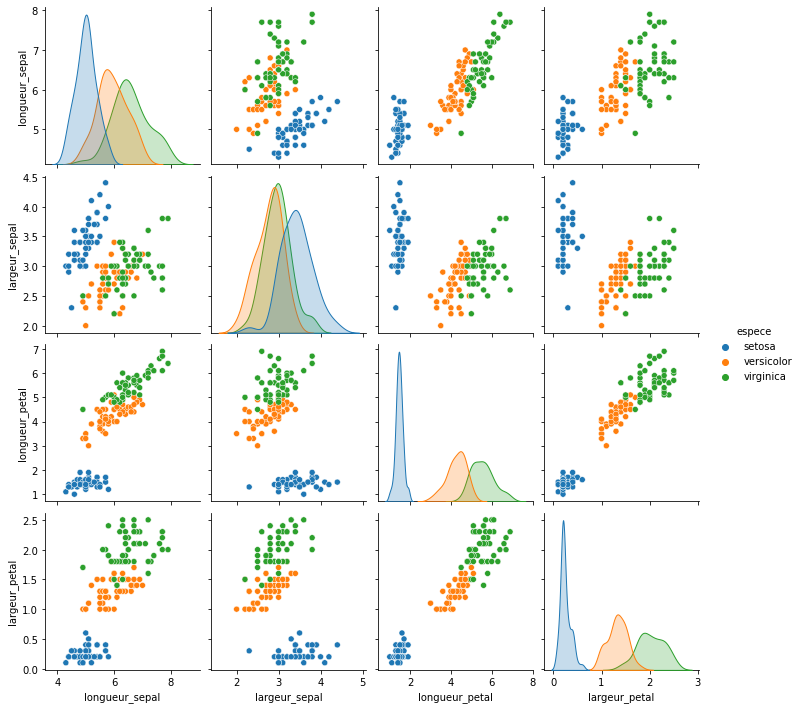

In [5]:
irisGraph = sns.pairplot(iris, hue="espece")
plt.show()

### Liaison statistiquement significative : mesure des pétales

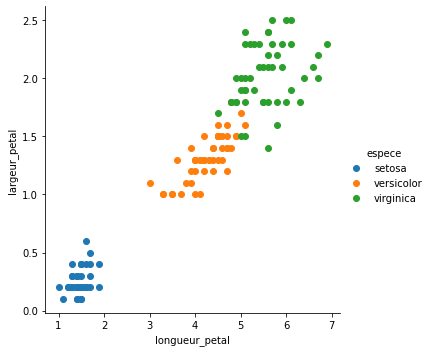

In [6]:
irisGrid = sns.FacetGrid(iris, hue = "espece", height=5)
irisGrid.map(plt.scatter, "longueur_petal", "largeur_petal")
irisGrid.add_legend()
plt.show()

Les différentes mesures suivant les espèces semblent suivre une liaison linéaire si on les étudie suivant ce critère choisi.

### Liaison statistiquement significative : mesure des sépales

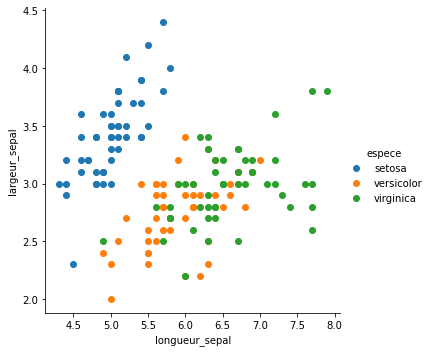

In [7]:
irisGrid = sns.FacetGrid(iris, hue = "espece", height=5)
irisGrid.map(plt.scatter, "longueur_sepal", "largeur_sepal")
irisGrid.add_legend()
plt.show()

Ici les données sont plus dispersées, il est donc plus compliqué de conclure statistiquement parlant.

### Analyse mathématique

#### Corrélation de l'ensemble du dataset

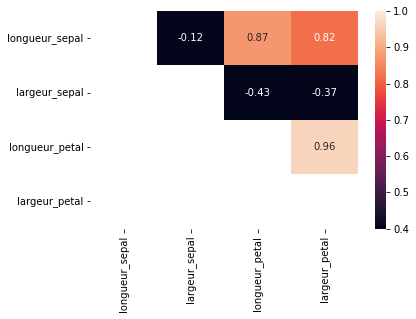

In [8]:
mask = np.tril(np.ones_like(irisCorr, dtype=bool))
sns.heatmap(irisCorr, mask=mask, vmin=0.4, vmax=1, annot=True)
plt.show()

Comme analysé graphiquement, le meilleur critère de sélection à retenir est la comparaison des pétales. En cas de doute, c'est-à-dire si une mesure est à la frontière entre les espèces Versicolor et Virginica, on pourra étudier la longueur de son sépal entre la longueur et la largeur du pétale afin de choisir sa caégorie.